# Introduction 
(Dipanshu Gupta)

## What is Bike Sharing? 

Bike sharing systems are a means of renting bicycles where the process of obtaining membership, rental, and bike return is automated via a network of kiosk locations throughout a city. Using these systems, people are able rent a bike from one location and return it to a different place on an as-needed basis. Currently, there are over 500 bike-sharing programs around the world [2]. These bicycles can be rented for a short price or a fee. Earliest experiments with Bike Sharing go back to 1965, when Luud Schimmelpennink [1] painted fifty bicycles white and placed them unlocked in Amsterdam for everyone to use freely. 

## Why is Bike Sharing Relavant Today?

With increasing vehicular pollution, public transport is the most effective solution for mass-transportation. There are three cases in which bike sharing programs are desirable: 

1. For short distances where the cost of renting a bike is lower. 
2. For the last mile from your train/bus station to your destination. 
3. Simply for leisure without commiting to owning a bike. 

Today, bike sharing is not limited by traditional bikes, but also includes e-Scooters, which are all the rage around the world now. Rising need for modernized transportation infrastructure and sustainable urban mobility are driving the transition from conventional to electric modes of transport [3]. They provide a fun, inexpensive and rapid way to travel in cities. 

The data generated by these systems makes them attractive for researchers because the duration of travel, departure location, arrival location, and time elapsed is explicitly recorded. Bike sharing systems therefore function as a sensor network, which can be used for studying mobility in a city. 

## Market

The global Bike-Sharing Service market is valued at 1570 million USD in 2018 and is expected to reach 5440 million USD by the end of 2024, growing at a CAGR of 28.3% between 2019 and 2024. Age 25-34 is the largest demographic, which took up about 38% of the global total in 2018 [4]. The Asia-Pacific will occupy more market share in following years, especially China. Fast growing India and Southeast-Asia regions are projected amass an increasing share. Germany, despite has had high bike ownsherhip rates, but rental programs have peformed decently well. June 2019 saw the introduction of the first e-Scooters in Frankfurt. They have been very popular and few members of the group are 

### There are 3 major bike sharing programs in Frankfurt [5]: 

1. DB Call a Bike
2. Visa NextBike
3. Windbyke

### The major e-Scooter companies in Frankfurt are: 

1. Lime
2. Tier
3. Circ

## Why do we want to forecast Bike Demand? 

It is important for bike sharing companies to distribute bikes across the city such that there more bikes in areas with higher demand and vice-versa. Traditional bikes are prone to thefts and hence the companies don't want to be liable for more bikes than a certain demand threshold. e-Scooters, on the other hand, rely much more on forecasting demand. This is because they run on electricity and they have to be charged by employees, known as *Juicers*. Having a better forecast model has a business value in terms of: 

1. Better distribution, leading to more potential customers. 
2. Right number bikes on street, leading to decreased liability. 
3. Appropriate vehicle inventory, to manage use of capital. 

## Context

In this project, we were asked to combine historical usage patterns with weather data in order to forecast bike rental demand in the Capital Bikeshare program in Washington, D.C. The data is for the years of 2011 and 2012. This dataset was provided by Hadi Fanaee Tork using data from Capital Bikeshare [6]. 

The same project was a competition on Kaggle [2] 4 years ago. 

![kaggle.png](kaggle.png)

# Data Exploration
(Robert Maerz and Benedikt Kirsch)

## The Dataset

To prevent future issues when predicting rental counts, we begin by familiarising ourselves with the dataset, starting with a simple analysis, exploring details step by step. 

In [2]:
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

In [7]:
df = pd.read_csv("BikeRental.csv")
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
df.shape

(17379, 17)

We have 17379 rows of data, with 17 columns. 

In [8]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

Looking at the data, we start speculating about its structure as we observe the following:

- All columns except `dteday` appear to contain numerical values. 
- Values related to weather data (`temp`, `atemp`, `hum`, `windspeed`) might be scaled, as they range in the 0.XX area. 
- Values in the instant column increase by 1 and appear to be related to the row number. 

So we dig deeper to understand more about the structure of the dataset. 

## Searching for Missing Values

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


This confirms our suspicions that we are in fact dealing with numeric columns only (except dteday).

In [11]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

To our surprise, none of the columns contain NaN values, which we suppose will reduce the effort we have to put into cleaning the data later on. However, there are some missing values that can go un-noticed. Let us plot a distribution of how many days have how many data points. 

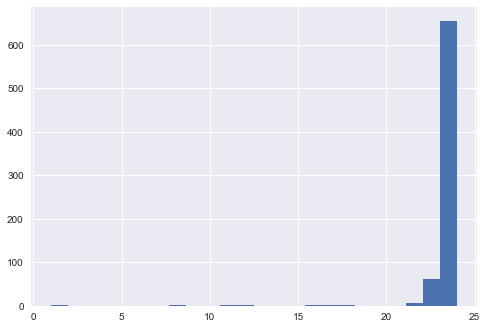

In [39]:
hours_per_day = df.groupby('dteday').count()['instant'].hist(bins=24)

While most of the days have data for the full 24 hours, some days have a few hours of data missing. Hours with missing data in this context can mean one of two things: 1) the data is legitly missing so we need to correct for it or 2) hours missing from the data indicate a total count of rentals equal to 0, meaning no bikes were rented at that time. For case 2 we will not have to correct, so we check the data for existing 0 counts.

In [9]:
0 in df.cnt.values

False

Good news! Cnt contains no 0 values, so we can safely assume we are dealing with case 2 here, "hours absent from the dataset indicate no rentals at that hour".

## Statistics

We now start analysing each column, running statistics.

In [10]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Looking at these values and going back to our suspicions about the dataset, we can now observe and deduct the following: 

- The `instant` column ranges from 1 to 17379, which equals the number of rows the dataset has. Its mean, 25%, 50% and 75% values also support the assumption that the column is used as an incremental index. 
- The `season` column contains integers between 1 and 4 with a mean at ~2.5. Hence, we assume they are distributed equally. 
- The `year` column encodes two years as either 0 or 1 with a mean above 0.5, meaning one year is represented more often in the data than the other. 
- The `month` column ranges from 1 to 12, encoding each month as an integer. 
- `hours` are encoded as integers between 0 and 23. 
- `holiday` is a binary encoding using 0 and 1 with a mean that is very small, hinting at holidays being underrepresented in the data, which is to be expected. 
- `weekday` ranged from 0 to 6, encoding each day of the week. 
- `workingday` is, just like holiday, a binary encoding using 0 and 1. 
- `weathersit` is an integer column with values between 1 and 4. 
- `temp`, contrary to our suspicion earlier does not start at 0 but at 0.02 instead. It goes all the way to 1 and has a mean of just under 0.5. We hence expect to see a somewhat uniform distribution of temperature encoded values in the data. 
- `atemp` is by all means very close to temp, making us question the columns usefulness for further analysis. 
- `humidity` ranges from 0 to 1. 
- `windspeed` starts at 0 but goes up only to a value of 0.85. 
- numbers for `casual` users are a lot lower than for `registered` ones, indicating that both groups might need to be reviewed in more detail separately from another. 
- The *maximum* number of bikes rented in one hour is 977. 

Out of curiosity, we look for the day when the highest count of total rentals is achieved. We find that on this day and hour, 886 registered users were riding bikes, supplemented only by 91 casual users. This further hints at an imbalance of registered vs. casual users in the data, leaning heavily towards the former.

In [13]:
df[df['cnt'] == df['cnt'].max()]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
14773,14774,2012-09-12,3,1,9,18,0,3,1,1,0.66,0.6212,0.44,0.2537,91,886,977


We now proceed to create a summary view of the data in each column.

In [10]:
asc_cols = ['season','mnth','weekday','hr'] # columns we want to see in different order or more than just the top 10 of
skip_cols = ['temp','atemp','hum','windspeed','instant','dteday'] # columns we are skipping because they are scaled or an index

for (columnName, columnData) in df.iteritems():
    if columnName not in skip_cols:
        if columnName in asc_cols:
            print(f'Column Name: {columnName}')
            print(columnData.value_counts().nlargest(24).sort_index())
            print(f'\n')
        else:
            print(f'Column Name: {columnName}')
            print(columnData.value_counts().nlargest(10))
            print(f'\n')

Column Name: season
1    4242
2    4409
3    4496
4    4232
Name: season, dtype: int64


Column Name: yr
1    8734
0    8645
Name: yr, dtype: int64


Column Name: mnth
1     1429
2     1341
3     1473
4     1437
5     1488
6     1440
7     1488
8     1475
9     1437
10    1451
11    1437
12    1483
Name: mnth, dtype: int64


Column Name: hr
0     726
1     724
2     715
3     697
4     697
5     717
6     725
7     727
8     727
9     727
10    727
11    727
12    728
13    729
14    729
15    729
16    730
17    730
18    728
19    728
20    728
21    728
22    728
23    728
Name: hr, dtype: int64


Column Name: holiday
0    16879
1      500
Name: holiday, dtype: int64


Column Name: weekday
0    2502
1    2479
2    2453
3    2475
4    2471
5    2487
6    2512
Name: weekday, dtype: int64


Column Name: workingday
1    11865
0     5514
Name: workingday, dtype: int64


Column Name: weathersit
1    11413
2     4544
3     1419
4        3
Name: weathersit, dtype: int64


Column Name: casua

Looking through these summaries, we can establish a few things:
    
- Data is not spread equaly across seasons. Winter (1) and Fall (4) have ~5% less data than Spring and Summer
- Year 0 is slightly less often represented in the data than year 1, confirming our earlier suspicions
- Months are fairly even in count, with the exception of February. This might be due to the fact February natrually is the shortest month of the year
- The highest density of data is present for 4 PM, with later hours being very close until 1 AM. Building upon our earlier finding, we can deduct less people ride bikes between 2 AM to 5 AM as       these are underrepresented in the data
- There is an expected imbalance of non-holidays in the data
- Weekday and workingday show expected ratios
- There is a heavy imbalance in weathersit data, with situation 4 being represented only 3 times, whilst situation 1 makes up ~65% of all data
- Notably the count of casual users with the highest number of occourcances is 0 people, followed by 1 person
- By contrast, small bands of registered users are the most common in the data, impacting the frequency of the cnt variable  

## Correlation

Armed with this general understanding of the data, we dive deeper to identify how the columns correlate with one another. We built a custom script to do this, called `correl_plot`. 

In [182]:
import correl_plot as cp

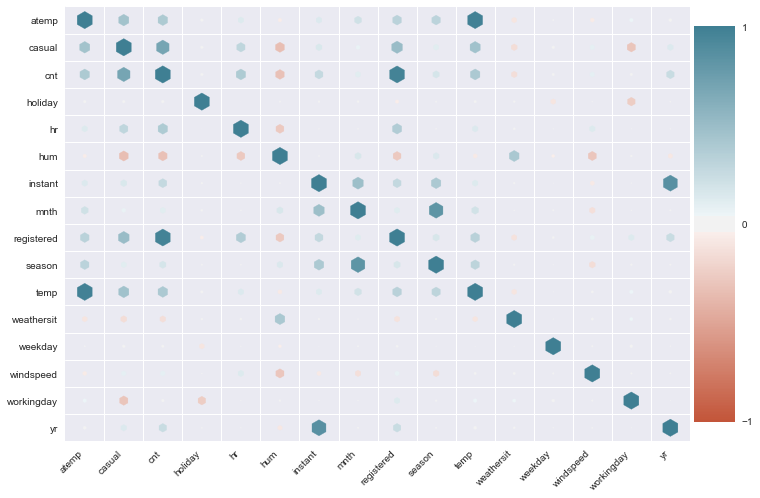

In [183]:
correl_ = cp.df_to_hexag(df)

For the correlation matrix a format is chosen that already provides visual indicators using color, opacity, and shape size. The bigger and less opaque a shape, the higher the correlation between the two columns it connects. Positive correlation is colored blue, negative correlation red. The image above gives important insight into how strongly columns are linked, with the following findings being the most important:

1. The vast majority of columns in the dataset are not correlated or the link is extremely weak
2. There are a lot more strong positive correlations than there are negative ones
3. The strongest correlations follow logical expectations about the data:

    a. Real temperature and felt temperature are strongly correlated. <br/>
    b. Weather situation has a positive correlation with humidity but a very weak negative correlation with registered users. <br/>
    c. Humidity has the strongest negative correlations with casual and registered users, hence also influencing the total count of users negatively. <br/>
    d. Working day is negatively correlated with casual users but slightly positive with registered users. 

## Distribution

Now, let us see how our data is distributed. We first import our plotting libraries. 

In [184]:
import matplotlib.pyplot as plt
import seaborn as sns

### Distribution of Rentals by Season

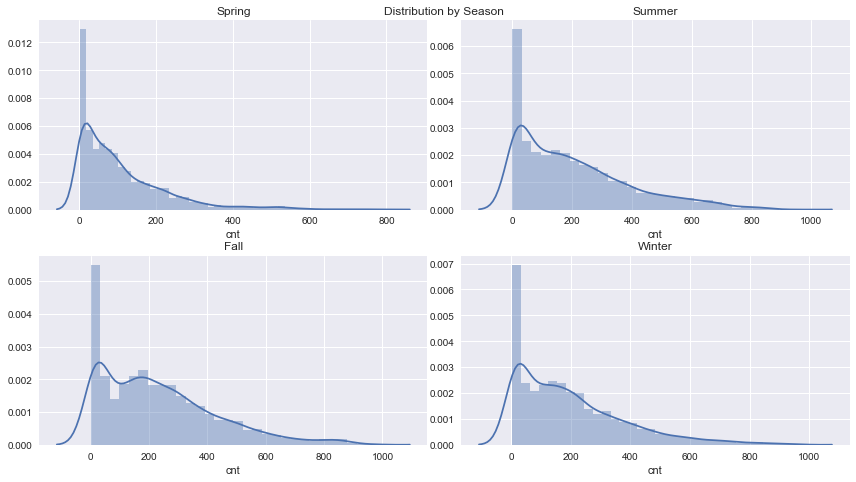

In [185]:
fig, ax = plt.subplots(figsize = [12, 7])
plt.axis('off')
plt.title("Distribution by Season")
labels = ['Spring', 'Summer', 'Fall', 'Winter']
for i, col in enumerate(df['season'].unique()):
    ax = fig.add_subplot(2, 2, i+1)
    sns.distplot(df[df['season']==col]['cnt'], ax=ax)
    plt.title(labels[i])
plt.tight_layout(h_pad=0.2, w_pad=0.2)

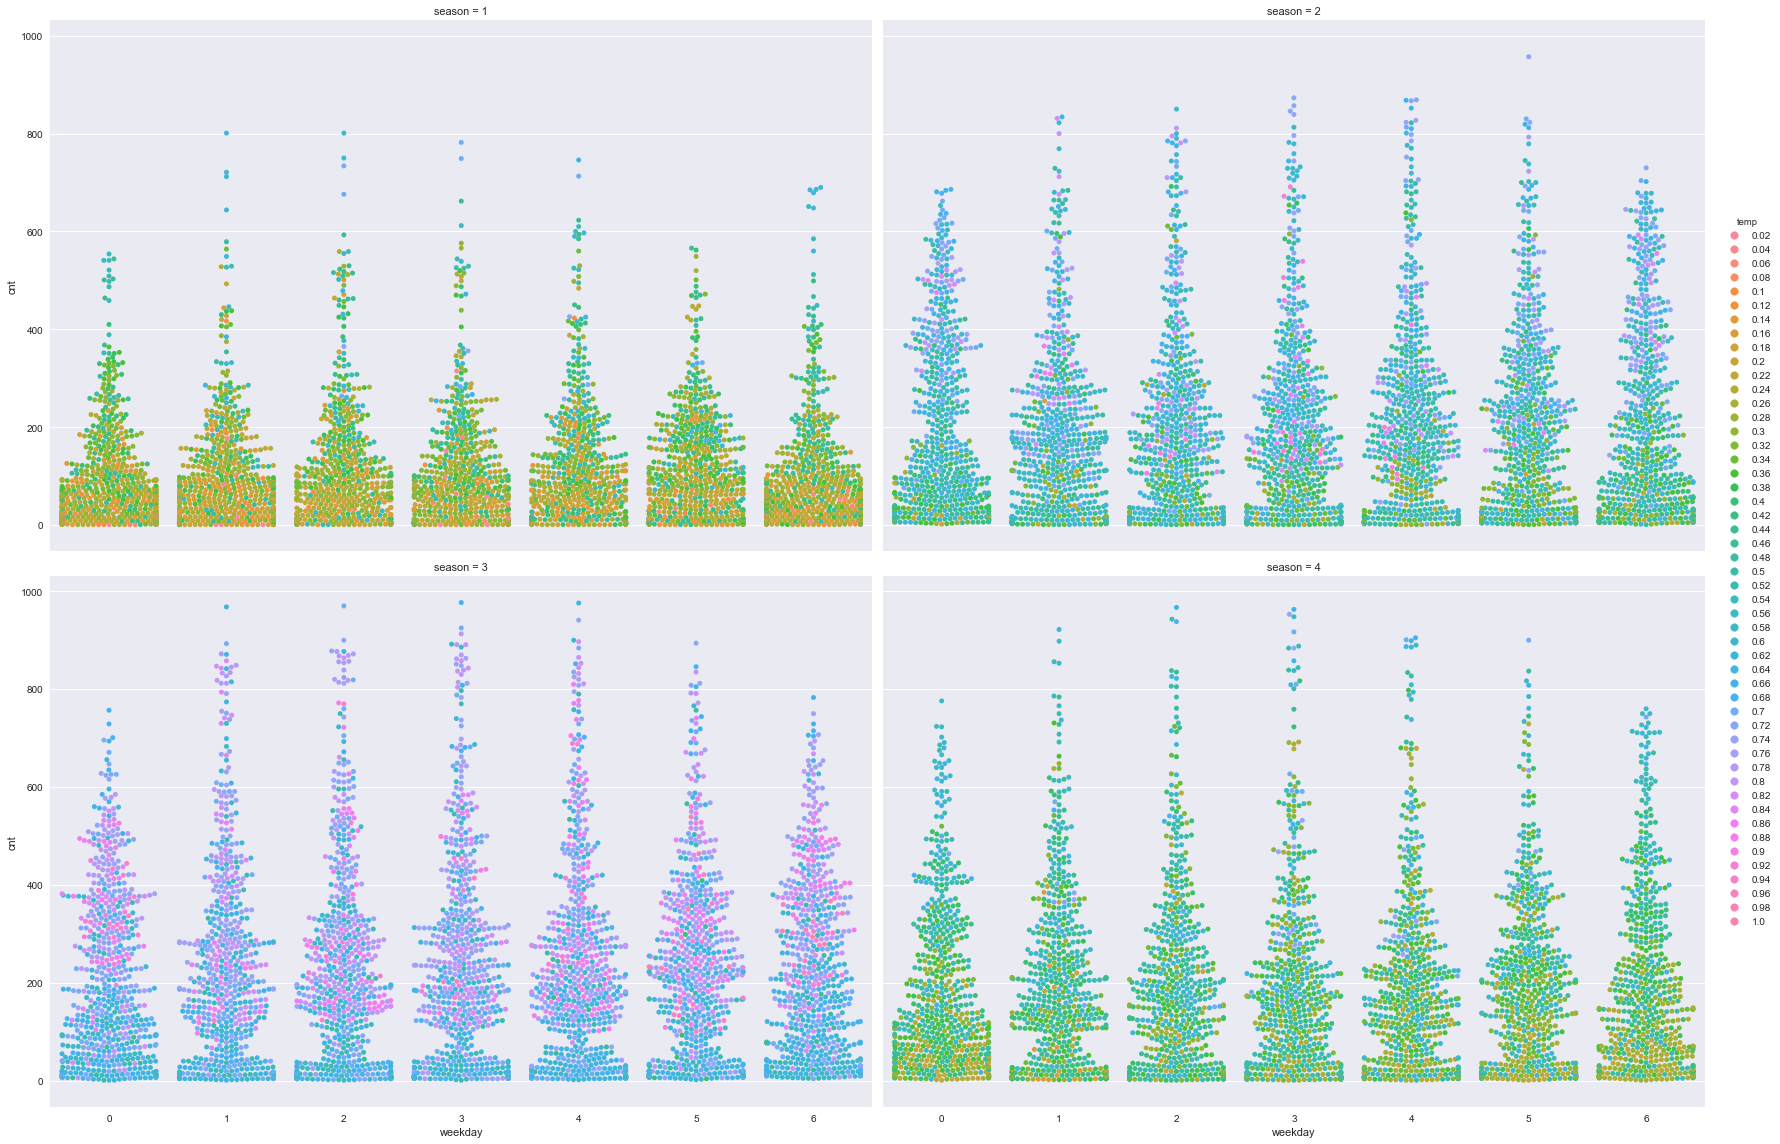

In [213]:
g = sns.catplot(x="weekday", y="cnt", hue="temp", col="season", col_wrap=2, 
                data=df, kind="swarm", height=8, aspect=1.5)

The distribution is similar for all seasons, but the absolute count may vary. 

### Distribution of Rentals by Weather Situation

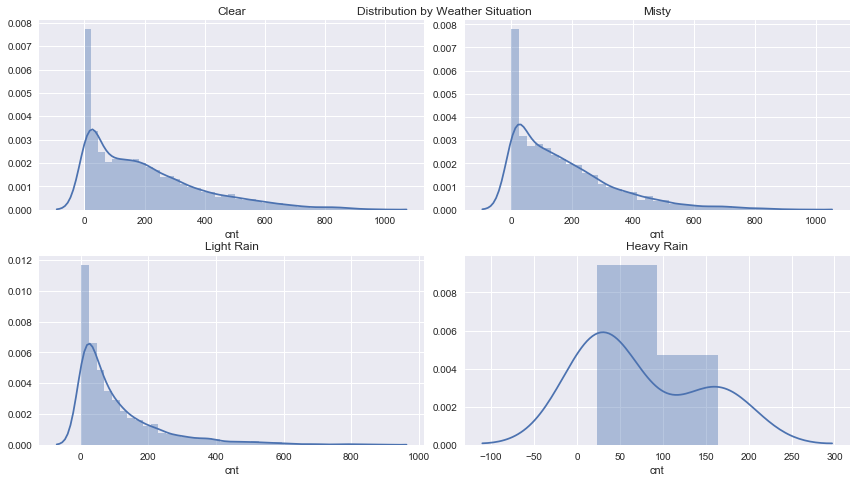

In [186]:
fig, ax = plt.subplots(figsize = [12, 7])
plt.axis('off')
plt.title("Distribution by Weather Situation")
labels = ['Clear', 'Misty', 'Light Rain', 'Heavy Rain']
for i, col in enumerate(df['weathersit'].unique()):
    ax = fig.add_subplot(2, 2, i+1)
    sns.distplot(df[df['weathersit']==col]['cnt'], ax=ax)
    plt.title(labels[i])
plt.tight_layout(h_pad=0.2, w_pad=0.2)

The distributions for the three less extreme weather situations ('Clear','Misty','Light Rain') is very similiar by shape.
Moreover, in magnitude, clear and misty weather conditions are similar as well, while the frequency for much lower usage
during light rain is more pronounced. All three distributions are positively skewed with large, low-frequent observations
in the right tail. Outliers shall be examined in the next section.

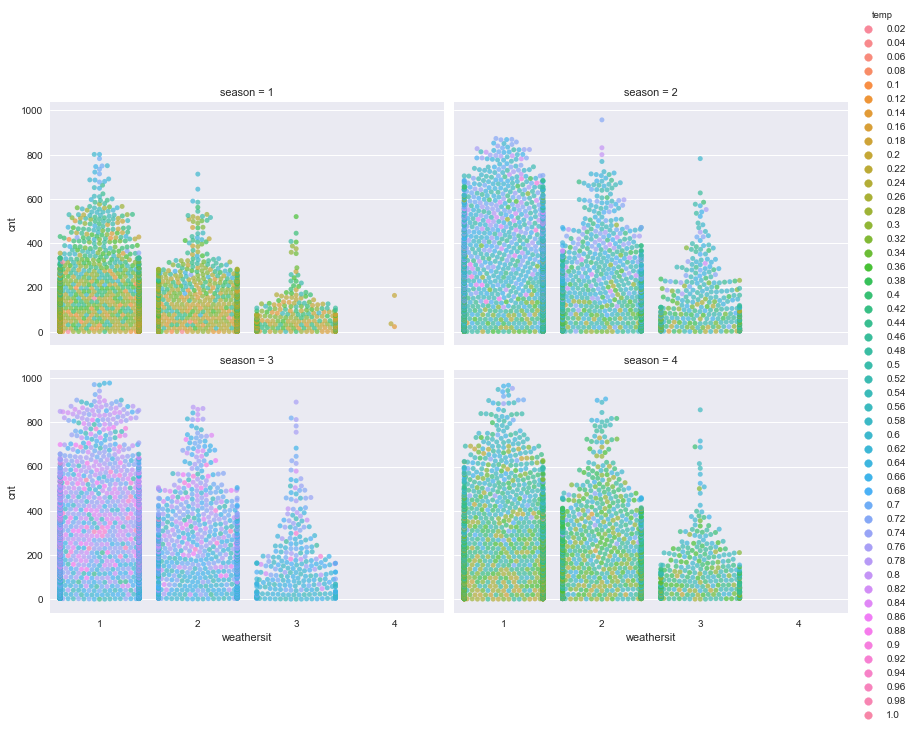

In [227]:
w = sns.catplot(x="weathersit", y="cnt", hue="temp", col="season", col_wrap=2,
                data=df, kind="swarm", height=4, aspect=1.5, alpha=0.7)

Further examining the data set by weather situation, one can see that there are only four data points for heavy rain, which explains the distorted histogram above. Besides that this depiction allows to deduce that the highest user count in each segment and high temperatures are correlated with each other. 

### Distribution by Temperature 

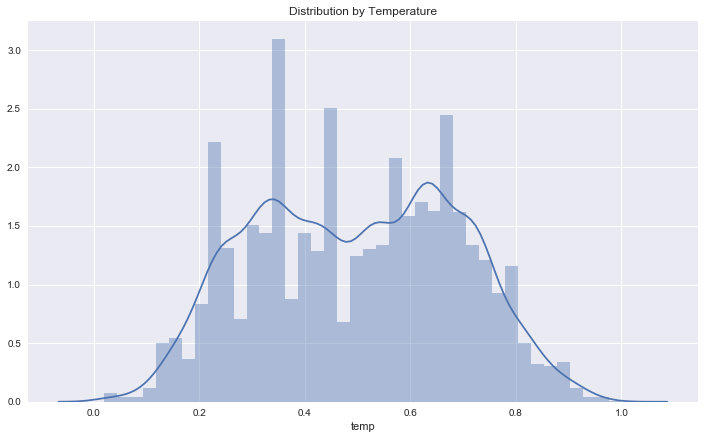

In [188]:
fig, ax = plt.subplots(figsize = [12, 7])
sns.distplot(df['temp'])
plt.title("Distribution by Temperature")
plt.show()

The temperature histogram can be approximated by a bi-modal, quasi-symmetrical distribution with large shoulders
and a less pronounced center. As the data has already been normalized, this shape is not surprising. 

## Outliers

Outliers are data points that differ greatly from the rest of the data set. For numerical data, a common convention to define outliers as observations falling more than 1.5 to 3 times out of the interquartile range of a distribution (with more than 3 times being classified as *extreme outliers*).  These outliers observations should be examined carefully, as their existence can contain valuable information about the gathering of data / measurement process and the distribution of the underlying data. Before eliminating outliers, one hence needs to understand if they arose from measurement errors or if the underlying distribution is leptokurtic (i.e. heavy-tailed, which would impact models assuming a normal distribution). Elimination is then needed if the former is true, or if the outliers would introduce a bias to the analysis.

Hence, one should first understand how many points fall outside the extreme boundaries. Since most features are categorical (see Section 3.1) or have been normalized beforehand, only the user counts (`cnt`, `casual`, `registered`) have to be examined here.

In [207]:
stat_table = df.describe()
cnt = df["cnt"]
casual = df["casual"]
registered = df["registered"]

outlier_table = np.ones([3,2])
def outlier_treatment(sequence, TR=1.5):
    sorted(sequence)
    Q1,Q3 = np.percentile(sequence , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (TR * IQR)
    upper_range = Q3 + (TR * IQR)
    return lower_range,upper_range

In [208]:
k = 0
for user in [cnt, casual, registered]:
    i = 0
    for tr in [1.5,3]:
        lowerbound,upperbound = outlier_treatment(user, TR=tr)
        extreme_outlier = len(user[(user < lowerbound)|(user > upperbound)])/len(user)
        outlier_table[k,i] = extreme_outlier
        i += 1
    k += 1
outlier_table = pd.DataFrame(outlier_table*100)
outlier_table.index = ["cnt","casual", "registered"]
outlier_table.columns = ["TR=1.5","TR=3.0"]
outlier_table

,TR=1.5,TR=3.0
cnt,2.905806,0.000000
casual,6.858853,2.825249
registered,3.912768,0.258933


As the results table shows, for the overall count, no observation falls outside the threshold of 3 and hence no extreme outliers are present in the data, and less than 3% lie in between the [1.5 - 3]x interquartile range. 

![Outlier_Cnt_Weekday.png](Outlier_Cnt_Weekday.png)

However, whilst registered user express similar characteristics, casual user have a much higher share of outliers and extreme outliers. This is visualized by an overlay of the respective box plots with a swarmplot split by weekdays. Moreover, besides differences in extreme values, one can observe a difference in user counts by weekdays. This will be further examined in the next section.

![Outlier_Registered_Weekday.png](Outlier_Registered_Weekday.png)

![Outlier_Casual_Weekday.png](Outlier_Casual_Weekday.png)

Overall, cross-checking for the largest outliers using:

In [231]:
df[df['cnt'] == df['cnt'].max()]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
14773,14774,2012-09-12,3,1,9,18,0,3,1,1,0.66,0.6212,0.44,0.2537,91,886,977


In [233]:
df[df['casual'] == df['casual'].max()]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
10477,10478,2012-03-17,1,1,3,16,0,6,0,1,0.64,0.6212,0.5,0.0,367,318,685


In [234]:
df[df['registered'] == df['registered'].max()]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
14773,14774,2012-09-12,3,1,9,18,0,3,1,1,0.66,0.6212,0.44,0.2537,91,886,977


shows that all other features falls in their normal ranges and hence most likely there have been no measurement errors. For these reasons, we decided to not cut off any outliers and keep the data sets as they are.

## Heatmap 

As observed in Section 2.4, the correlation structures shed some light on possibly important relationships in our data set. Interestingly, the user count for casual users is slightly negatively correlated with working days, whilst being slightly positively correlated with registered users. This high-level observation might have several implications: first of all, the two groups of users could express distinct usage behaviors hence resulting in different response to other features of the data set provided. If this were the case, the data set would actually be composed of two structurally different, low correlated data sets. Consequently, an analysis on the overall data set might lead to inferior model performance. 

For this reason, a more granular analysis is needed. We therefore look at the relationship between overall usage (as measured by bike rental counts / hour), usage by registered users and finally usage by casual users with the respective day of the week and the hour of the day. The hypothesis here is that usage data should differ between these groups. A heatmap plot proves to be a nice visualization of these multi-faceted relationships. Thus, we generate three heatmaps plotting the average usage per user group per weekday per hour of the day to gain further insights. 

First, we must arrange the data set accordingly for the three user groups.

In [190]:
import numpy as np

In [191]:
br_hour_week = df[["weekday","hr","cnt"]].copy()
br_hour_week["weekday"] = pd.Categorical(br_hour_week["weekday"], br_hour_week.weekday.unique())
br_hour_week["hr"] = pd.Categorical(br_hour_week["hr"], br_hour_week.hr.unique())
br_hour_week_matrix = br_hour_week.pivot_table(values='cnt', index="weekday", columns="hr",aggfunc=np.mean)
br_hour_week_matrix.index = ["Saturday","Sunday","Monday","Tuesday","Wednesday","Thursday","Friday"]

For registered users, 

In [193]:
br_registered = df[["weekday","hr","registered"]].copy()
br_registered["weekday"] = pd.Categorical(br_registered["weekday"], br_registered.weekday.unique())
br_registered["hr"] = pd.Categorical(br_hour_week["hr"], br_registered.hr.unique())
br_registered_matrix = br_registered.pivot_table(values='registered', index="weekday", columns="hr",aggfunc=np.mean)
br_registered_matrix.index = ["Saturday","Sunday","Monday","Tuesday","Wednesday","Thursday","Friday"]

For casual users, 

In [194]:
br_casual = df[["weekday","hr","casual"]].copy()
br_casual["weekday"] = pd.Categorical(br_casual["weekday"], br_casual.weekday.unique())
br_casual["hr"] = pd.Categorical(br_casual["hr"], br_casual.hr.unique())
br_casual_matrix = br_casual.pivot_table(values='casual', index="weekday", columns="hr",aggfunc=np.mean)
br_casual_matrix.index = ["Saturday","Sunday","Monday","Tuesday","Wednesday","Thursday","Friday"]

Now we can set up the heatmap plots using the `Seaborn` library. 

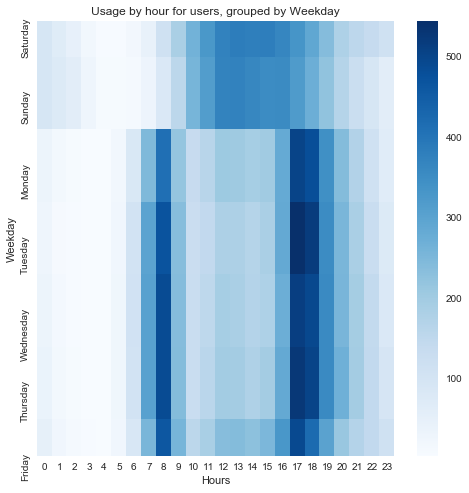

In [195]:
fig = plt.figure(figsize=(8,8))
r = sns.heatmap(br_hour_week_matrix, cmap='Blues')
r.set_title("Usage by hour for users, grouped by Weekday")
r.set_xlabel('Hours')
r.set_ylabel('Weekday')
plt.show()

Looking at the overall usage plot yields another interesting result: there is a distinct difference between bike rentals during the weekend and on those on the weekends respectively. Whilst, bike usage has a bi-modal distribution during weekdays, it is unimodal on the weekends, showing peaks at different hours of the day. Therefore, one can recognize two different structural regimes in the data set and should split data by working days and weekends.

Examining the usage data for the different subgroups sheds more light on this.

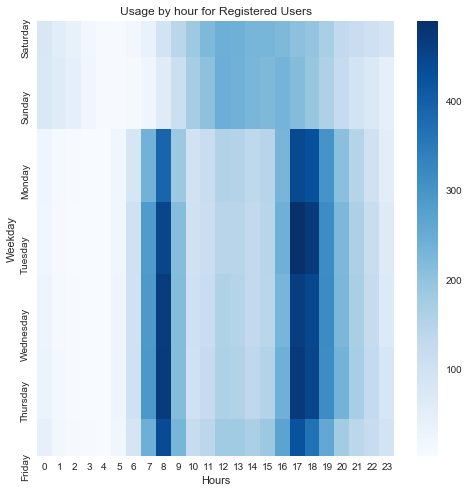

In [196]:
fig = plt.figure(figsize=(8,8))
r = sns.heatmap(br_registered_matrix, cmap='Blues')
r.set_title("Usage by hour for Registered Users")
r.set_xlabel('Hours')
r.set_ylabel('Weekday')
plt.show()

For registered users, there is a strong bi-modality with peaks at morning and afterwork rushours authentically reflecting consumption patterns of frequent bike rental users on their way to work and back home. On the weekend, however, this group portrays a different behavior, with peak usage hours around noon, but less pronounced than its usage during the week. Comparing these results to casual users, one can observe the opposite pattern. 

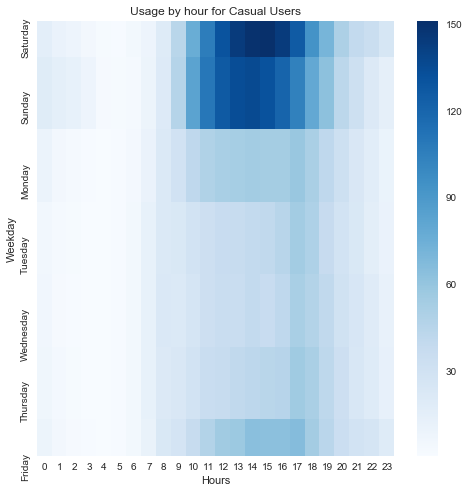

In [197]:
fig = plt.figure(figsize=(8,8))
r = sns.heatmap(br_casual_matrix, cmap='Blues')
r.set_title("Usage by hour for Casual Users")
r.set_xlabel('Hours')
r.set_ylabel('Weekday')
plt.show()

There is a strong concentration of usage during mid-day hours on weekends and a much less pronounced usage during working days. The following section will deal with the conclusions drawn from these observations. 

## Conclusion and Important Takeaways
(Johannes Hufeld)

Our exploratory data analysis has allowed us to draw first conclusions on our data set. First of all, a look at the bike usage patterns by subgroups (casual users and registered users), depicted strongly different behavior. While the former prefer renting bikes during the weekend, the latter are frequent users with peak-usage on working-days around the times of the rush hours. This has led us to postulate the hypothesis that overall model performance can be improved by treating modeling these subgroups separately from one another. A look at the visualizations in section 2.3) also showed that data is to further be split up into working days and weekends (including holidays, please see the section above on data preparation), as usage data for both groups diverges here as well. The performance evaluation in section 5 shall provide further insights on whether our thesis could be verified or not. 

Further supporting our thesis is a first look at the other features and their effects on rental patterns. 

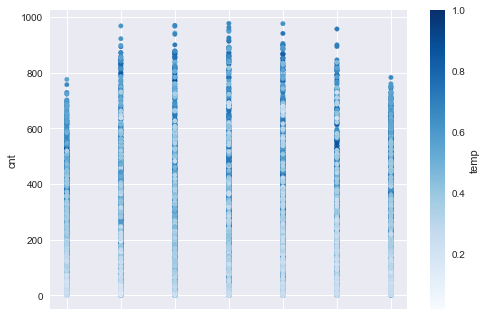

In [198]:
total_plot = df.plot.scatter(x="weekday", y="cnt", c="temp", colormap="Blues")

Moreover, the data showed seasonal patterns with bike counts being clearly affected by temperature and hence month. When splitting the count by user groups, another divergent pattern emerges: while bike counts for casual users are positively correlated with temperatures and felt temperatures, there are only mild correlations with the group of registered users.  

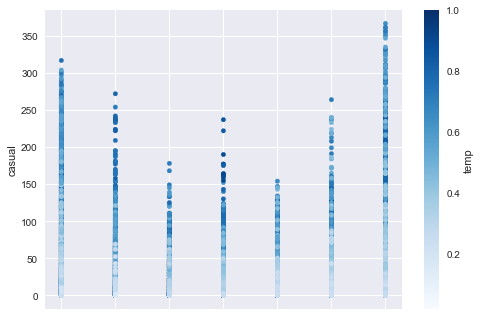

In [199]:
casual_plot = df.plot.scatter(x="weekday", y="casual", c="temp", colormap="Blues")

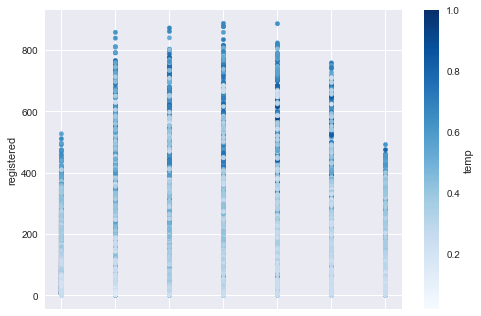

In [200]:
registered_plot = df.plot.scatter(x="weekday", y="registered", c="temp", colormap="Blues")

Humidity has the strongest negative correlations with casual and registered users (consequently influencing the total count of users negatively), but has no correlation with temperatures and hence has to be further examined. 

# Data Preparation
(Johannes Hufeld)

## Variables

To make data preparation testing more convenient we created a data pipeline (in the form of a python library) that allows us to call different kind of data set variations according to our demand. There are however also variables which regardless of feature and test split were always treated the same. We tested a number of different ideas about how to encode or transform our feature variables. Even though we use one specific set of feature engineering for our end results, we will also present a large number of feature tests including different encoding techniques and data set splits which brought us to our concluding data preparation. In the end we found a variation that delivered robust results for both Gradient Boost Regressor and Random Forest Regressor (the next chapter will cover the models we used for this project). 

Section 2.2 covered the meaning of each variable, this section will be more concerned with the type of variable and its implication for feature engineering. The raw dataset comes with the following datatypes:

In [113]:
df.dtypes

instant         int64
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

Below we will provide information for each variable whether it could contribute to the prediction accuracy and if so how we decided to encode it for our final data set preparation. 

### Unmodified Variables 

- `yr`: The year variable will not be adapted. This is an important category because the absolute number of users in 2012 is much higher compared to 2011, “yr” carries this information. Because our data set only contains two years, this is by default a handy binary classifier. 

- `holiday`: A holiday is a day between Monday and Friday which is not a working day (i.e. it is a free day). In this sense, there are no holidays on the weekend because they are free of work anyway and the holiday variable works as a “free of work” categorization. Again, as we will see later this caries important information and also already has the form of a binary classifier. We therefore won’t change it. 

- `workingday`: This is another categorical variable that is 0 when the current day is a holiday or a weekend. This is a crucial classifier, we leave it in.

- Weather Data: Temperature `temp`, similarly to the *felt* temperature `atemp`, the humidity `hum` and windspeed `windspeed` are already normalized numerical weather parameters for a given hour for any given day. Even though `atemp` is highly correlated to `temp`, we decided to leave it in the data set as it provides overall more unique data entries and could this be beneficial to the prediciton. All four variables can be used the way they were provided to us. 

- User Count: The dataset contains three different potential target variables. Depending on our data we will either choose to predict the total number of users `cnt` at any given hour or we will predict casual `casual` and registered `registered` users individually and sum up the results. Our target variable is the only variable that was not either already normalized or in a binary form. Due to its continuous nature we tested both normalizing and not normalizing. At the end of this chapter and also in the results section we will show which technique came out on top. 

### One-Hot Encoded Variables

Both the season `season` and weather situation `weathersit` variable provide a good opportunity to one-hot encode these features. One-hot encoding transforms a categorical feature with more than two characterizations into multiple “one-hot-coded” columns which will include a binary classifier for each individual category of the original feature. The number of new categorical columns is therefore equal to the number of categories of the original feature. 

To one hot encode a column we call a function that is part of our data preparation library, 

In [116]:
def create_one_hot(df, column_name):
    """One-hot encode column values. Takes the df and column name as
    input and return the df with one-hot encoded columns as output.
    """
    df[column_name] = pd.Categorical(df[column_name])
    one_hot = pd.get_dummies(df[column_name], prefix = column_name)
    # add dummies to original df:
    df = pd.concat([one_hot, df], axis = 1)
    return df

On a later stage the original column will also be deleted, leaving only the newly encoded dummy variables. To avoid the **dummy-trap** (multicollinearity between dummy variables) we also deleted one newly encoded dummy column for each feature. 

### New Feature Variable: `rushhour`

Sometimes it can be beneficial to create an entirely new variable from a combination of existing variables or due to an insight out of the data exploration. As shown in Section 2.7, Registered users have a window of time in which they uses the bikes the most, which corresspond to office hours. We want to encode this information in a feature variable to improve predictions. 

In [117]:
df["rushhour"] = df[["hr", "workingday"]].apply(lambda x: int((x["workingday"] == 1 
                                       and (7 <= x["hr"] <= 8 or 17 <= x["hr"] <= 18))), axis=1)

In other words: `rushhour`, a binary classifier, will be 1 when it is a working day (`workingday` == 1) and the `hr` is either 7, 8, 17 or 18. 

### Cyclical-Transformed Variables

This dataset also includes multiple timely variables, which are cyclical in nature (e.g. months, weekdays, hour of the day). Cyclical means that each category level appears with a constant distance (e.g. Sunday every seventh day, there won't be another Sunday after just three days).

These variables could also be one-hot encoded, this would however create quiet a few new columns. This does not always have to be a problem, it does however introduce a large number of sparse entries which could distort results for tree based algorithms. Also, there are alternatives to encode cyclical data.

One way to encode the cyclical nature of a feature is to create two new variables out of it: a sine and a cosine transformation. 

In [119]:
df['hr_sin'] = np.sin(df.hr*(2.*np.pi/24))
df['hr_cos'] = np.cos(df.hr*(2.*np.pi/24))

In combination these two new features create a two dimensional representation of time, in which each point is distinct from all other points and also each point will keep the same distance to all other points at any given moment. The result might be more intuitive when plotting the sine and cosine feature against each other: 

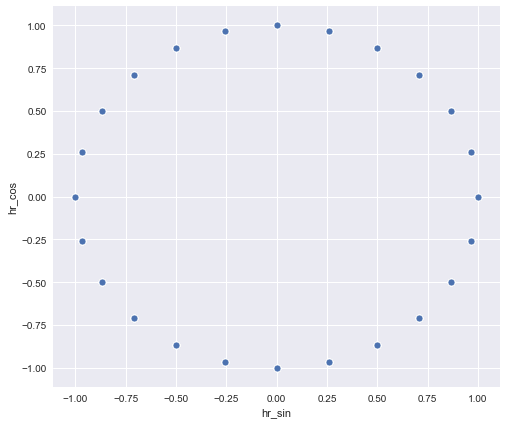

In [133]:
plt.figure(figsize=[8,7])
sns.scatterplot(x=df["hr_sin"], y=df["hr_cos"])
plt.show()

What used to be a series of just label encoded categories (`hr` $\in$ [0,1,2…,22,23]) is now a two feature relation that encodes any hour of the day without any unwanted weight towards any other hour. In addition it  restores correct distance relations between any two hours of the day (when previously `hr` = 23 and `hr` = 0, in reality very close to each other, encoded a large distance).

The same could be done for weekdays and months. Here we have been testing a range of different combinations, including splitting the data set according to working day (see later section), leaving months and weekdays label encoded, cyclically encoding months and/or weekday, one-hot encoding (same technique as described above) one of them or one-hot encoding both months and weekdays. In the results section we will explain which data preparation routine came out ahead. 

### Dropped Variables

The Dateday `dteday` variable gave us the change to extract certain time feature using a pandas method. Because the most valuable time data was already provided with the data set, we decided to not use this feature any further and delete it for the analysis, as all its information if already provided using different variables, except for the day. There was no intra-month pattern in the data and hence the day information was not that useful. The column instant is just an index value which carries no valuable information for our task at hand, we therefore deleted it. 

Depending on our data set split, we might also drop either the total rental count column `cnt` or both casual `casual` and registered `registered` users. We will elaborate on this in the next section. Code snippet as an example how we dropped a column: 

In [135]:
df.drop(["dteday"], axis=1, inplace = True)

Exact implementation of hour feature engineering and data-preprocessing can be seen in the function `data_cleaning()` of our `prediction_library`. 

## Splitting Data by Weekday

Due to the rush hour behaviour we also prepared a data split that would create two seperate data sets according to the weekdays. For this we changed the weekday label encoding of Sundays from 0 to 7 to ensure an easier split. This label change is part of the data preparation function regardless of any splits because the label encoding adds a significant information gain (because it brings the Sunday label closer to the Saturday label while at the same time creating a greater distance between Sunday - now 7 - and Monday - still 0. This change correctly reflects the information shift for rental behaviour comparing weekend and workdays). 

In [139]:
df["weekday"][df["weekday"] == 0] = 7

To split the data set we prepared another function:

In [141]:
def split_data_by_day(df):
    """Creates a weekday and weekend split of the dataframe. 
    Returns them separately as dataframes.
    """

    # create a weekend-weekday split
    weekends = df[df['weekday'] >= 6].copy()
    weekdays = df[df['weekday'] <= 5].copy()
    #one hot weekdays
    weekdays = create_one_hot(weekdays, "weekday")
    weekends = create_one_hot(weekends, "weekday")

    weekdays[["weekday_1", "weekday_2", "weekday_3", "weekday_4",
                    "weekday_5"]] = weekdays[["weekday_1",
                    "weekday_2", "weekday_3", "weekday_4",
                    "weekday_5"]].astype("category")

    weekends[["weekday_6", "weekday_7"]] = weekends[["weekday_6",
               "weekday_7"]].astype("category")

    weekdays.drop(["weekday"], axis = 1, inplace=True)
    weekends.drop(["weekday"], axis = 1, inplace=True)

    return weekdays, weekends

Whether this turned out to be a good idea we will discuss in the results section.

## Splitting Data by User
(Johannes Hufeld and Dipanshu Gupta)

The data we were provided also included information about what kind of user rented a bike on a given hour. During any day, the absolute count of registered users is always greater than the absolute of casual users. Relative to their respective total size however, the two user groups show an inverse rental behaviour. Whereas relative size of registered users is greater during workdays compared to non working days, the relative size of casual users is greater on weekends compared to work days. 

We reproduce the plots above: 

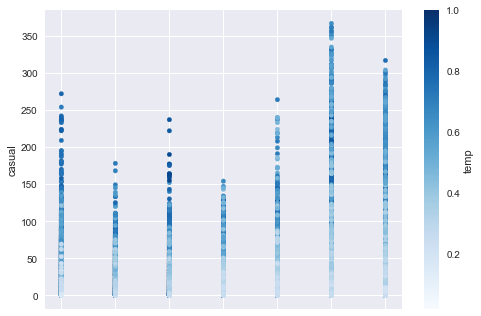

In [158]:
casual_plot = df.plot.scatter(x="weekday", y="casual", c="temp", colormap="Blues")

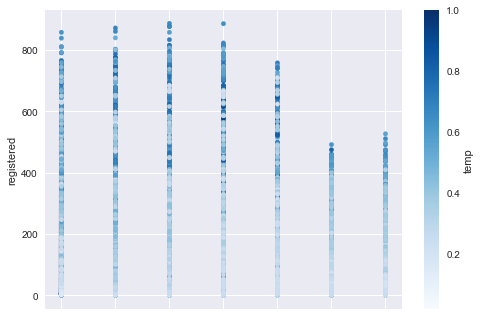

In [159]:
registered_plot = df.plot.scatter(x="weekday", y="registered", c="temp", colormap="Blues")

The first graph shows the total count of casual users for any given weekday (from the left - Monday, to the right - Sunday), the graph on the right shows total count of registered users for any given weekday. The colour scale indicates temperature (light = high temperature). For this reason, we decided to also test a data set split by user. Because we are still interested in the overall count of bike rentals for any given hour, a split also means that we later would have to sum the individual `y_casual` and `y_registered` predictions to compare them to their respective `y_cnt` value. 

To split by type of user we create two seperate dataframes when initializing X and Y:

In [160]:
def split_data_by_user(df):
    """Creates a Causal and Registered user split of the dataframe. Returns
    them separately as dataframes.
    """
    registered_users = df.drop(["casual"], axis=1)
    X_registered_users = registered_users.drop("registered", axis=1)
    y_registered_users = registered_users["registered"]
    casual_users = df.drop(["registered", "rushhour"], axis=1)
    X_casual_users = casual_users.drop("casual", axis=1)
    y_casual_users = casual_users["casual"]

    return X_registered_users, y_registered_users, X_casual_users, y_casual_users

The rush hour feature aims to encode registered user behaviour, it is therefore dropped for the casual split.

When users are not split, X and Y are initialized in the following way:

In [161]:
X_cnt = df.drop(["cnt"], axis=1)
y_cnt = df["cnt"]

## Final Overview

Overall there are probably many more feature combinations we could have tested compared to the ones we tested. To move on however we decided to use the following combination that provided stable results for multiple models in both a reg-casual split and non-split scenario. 

In [163]:
import prediction_library as pl

Using TensorFlow backend.


In [162]:
df = pd.read_csv("BikeRental.csv")

In [165]:
clean_data = pl.data_cleaning(df)

In [166]:
clean_data.head()

,season_1,season_2,season_3,weathersit_1,weathersit_2,weathersit_4,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,rushhour,hr_sin,hr_cos
0,0,1,0,1,0,0,0,1,0,6,0,0.24,0.2879,0.81,0.0,3,13,0,0.000000,1.000000
1,0,1,0,1,0,0,0,1,0,6,0,0.22,0.2727,0.80,0.0,8,32,0,0.258819,0.965926
2,0,1,0,1,0,0,0,1,0,6,0,0.22,0.2727,0.80,0.0,5,27,0,0.500000,0.866025
3,0,1,0,1,0,0,0,1,0,6,0,0.24,0.2879,0.75,0.0,3,10,0,0.707107,0.707107
4,0,1,0,1,0,0,0,1,0,6,0,0.24,0.2879,0.75,0.0,0,1,0,0.866025,0.500000


In [167]:
clean_data.dtypes

season_1        category
season_2        category
season_3        category
weathersit_1    category
weathersit_2    category
weathersit_4    category
yr              category
mnth            category
holiday         category
weekday            int64
workingday      category
temp             float64
atemp            float64
hum              float64
windspeed        float64
casual             int64
registered         int64
rushhour        category
hr_sin           float64
hr_cos           float64
dtype: object

# Forecasting Methods
(Saurabh Chakravorty)

## Linear Regression

- Linear regression in simple sense is just mapping relationship between scalar variables i.e either categorical or continuous. 
- The core idea of linear regression is to get the best fit line which estimates the predicted variable closer to the target variable so that the sum of residuals (sum of all distances of point from line) is minimised to a great extent. 
- Our classical model uses an extended form of multinomial regression (one independent target and other dependent variables to map the relationships) of continuous and hot encoded categorical data to depict how effect varies and what are the most significant coefficients affecting the relationship. 

![500px-Linear_regression.png](500px-Linear_regression.png)

## Multi-Layer Perceptron (MLP)

- A multilayer perceptron (MLP) is a deep, artificial neural network. It is composed of more than one perceptron.
- They are composed of an input layer to receive the signal, an output layer that makes a decision or prediction about the input, and in between those two, an arbitrary number of hidden layers that are the true computational engine of the MLP. 
- Multilayer perceptron’s train on a set of input-output pairs and learn to model the correlation (or dependencies) between those inputs and outputs.
- Training involves adjusting the parameters, or the weights and biases, of the model in order to minimize error.
- Backpropagation is used to make those weigh and bias adjustments relative to the error. 
- For each output variable in the data ( casual and registered users) we have modelled data with MLP to get correct coefficient values of weights understanding relationship of causation. 

![mlp_network.png](mlp_network.png)

## Long Short-Term Memory (LSTM)
(Benedikt Kirsch)

- Another model we implemented belongs to the family so-called *Recurrent Neural Networks* (RNN), namely the *Long Short Term Memory* (LSTM) model.
- Our reasoning behind this choice can be derived from the structure of the data. Especially referring to the heatmap plots Section 2.6, we observed an intra-day pattern of bike usage for the different sub groups of casual and registered users. Hence the time of the day plays a crucial role in the forecasting of bike rental demand, as different groups portray on average different and pronounced usage patterns during throughout the day.
- Storing information on prior usage can therefore be advantageous. For this matter a model with the capability of capturing intertemporal structures as those observed in the data are needed.
- LSTMs contain information outside the normal flow of the recurrent network in a gated cell. Information can be stored in, written to, or read from a cell, while this gated cell makes decisions about what to store, and when to allow reads, writes and erasures, via gates that open and close.
- The general idea of LSTMs is to regulate and minimize the vanishing gradient problem which is due to the solution to short-term memory. They have internal mechanisms called gates that can regulate the flow of information.
- LSTMs like any other neural network, require a lot of data because they have a lot of tunable parameters. Our simple model alone had more than 50,000 parameters.
- Setting up dropout layers in the architecture of the LSTM helped reducing the risk of overfitting. 

![lstm.png](lstm.png)

## Random Forests

- Often referred to as the *black box* approach to data modellers this approach relies on ensemble approach of decision trees where each tree is built separately in parallel side by bootstrap aggregation. 
- The model fits well the data in most of the cases due to ensemble approach as it calculates out of bag error (OOB) from each iteration and then estimates the effective value. 
- The bias on these models are high but not the variance as the simple aim is to reduce variance with very less correlation between the trees. 
- Our model takes this approach and makes the Random Forest model with variables having particular trend with the count of users given in a deterministic factor(i.e., weekday or weekend). 

![random.png](random.png)

## Gradient Boosting

- Gradient boost is built on the fundamental of weak classifiers which is also an ensemble approach to make regression trees based on gradient decent and boosting. 
- The fundamental difference between the two tree based approach is that trees which are built here are built on weak learner in a sequential manner so that accuracy is improved in each iteration. 
- The main goal of this approach is to decrease the bias in the models which tends to avoid overfitting. 
- The model used here fits the data with the users and builds it with strong accuracy rate. 

![DecisionTrees.png](DecisionTrees.png)

## Cross Validation

- K-fold cross validation score is used as a means of avoiding validation by test set as it significantly reduces the number of subsamples which could be used to train the data. 

- In this approach out of the all datasets data is divided into $k$-samples for each $k-1$ validation so that performance calculated is the combined result of each validated data sets independently by setting proper hyperparameters of the model. 

- The parameter grid model in sklearn package takes all the model and parameters and trains the model with $k$-fold cross validation approach returning the values of each model parameter independently. 

- The K-fold validation is used here intuitively with 5 subsamples and with a train and test split ratio of 80:20 percent for each of the four sub-samples. 

## Grid Search

For a lot of ML models, parameters will have a significant impact on the model performance. Tuning these parameters in combinations with each other is called a *grid search*. Tuning too many parameter variations will result in an uncomfortable amount of iterations which might make it very computation heavy. Since we are looking to cross validate our model and also tune the parameters, it makes a lot of sense to use the scikit `GridSearchCV` class. It allows us to choose the number of partitions (typically 5 or 10) and then implements the model, testing parameter combinations over different dataset partitions, killing two birds with one stone. 

## Evaluation Metrics

### R2

R-squared (R2) is the proportion of variation in the outcome that is explained by the predictor variables.  R2 corresponds to the squared correlation between the observed outcome values and the predicted values by the model. The higher the R-squared, the better the model. 

### pseudo-R2

In very similar fashion to R2, pseudo-R2 also shows the proportion of variation in the outcome that is explained by the predictor variable. The “proportion of variation” for “just” R2 as it is described above is calculated (for the test data set) by the sum of the squared difference of our test target variable minus the mean value of our test target variable. For pseudoR2 this proportion is calculated using the mean value of the training variable. This will make the pseudoR2 measure more robust because the pseudoR2 denominator for our test evaluation is not calculated using what we are trying to prove. 

### Root Mean Squared Error (RMSE)

Root Mean Squared error shows the extent to which residuals are distributed around the predicted value. Higher the extent of residual error more is the extent of randomness and low the centrality of extent of distribution but less the value more accurate is the regression value. 

### Mean Absolute Error (MAE)

Mean absolute error is simply the sum of squared averages of difference of absolute value and the predicted value. 

# Forecasting
(Johannes Hufeld, Dipanshu Gupta, Benedikt Kirsch)

For forecasting, we consider four cases, as illustrated below. We will run each split variation (including one “pure” data set with no splits) and compare the results.

## Prediction with no Data Splitting

First, let's clean the data. 

In [32]:
df2 = pl.data_cleaning(df, four_split=False)
df2.head()

,season_1,season_2,season_3,weathersit_1,weathersit_2,weathersit_4,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,rushhour,hr_sin,hr_cos
0,0,1,0,1,0,0,0,1,0,6,0,0.24,0.2879,0.81,0.0,16,0,0.000000,1.000000
1,0,1,0,1,0,0,0,1,0,6,0,0.22,0.2727,0.80,0.0,40,0,0.258819,0.965926
2,0,1,0,1,0,0,0,1,0,6,0,0.22,0.2727,0.80,0.0,32,0,0.500000,0.866025
3,0,1,0,1,0,0,0,1,0,6,0,0.24,0.2879,0.75,0.0,13,0,0.707107,0.707107
4,0,1,0,1,0,0,0,1,0,6,0,0.24,0.2879,0.75,0.0,1,0,0.866025,0.500000


We create X and y to feed the model. 

In [7]:
X = df2.drop("cnt", axis=1)
y = df2["cnt"]

To do the actual forecasting, we have created a custom class called `Regressors`. It is defined in the `prediction_library`. It has all the forecast models we use below. The models then call a `fitter` function, that performs a Grid Search on parameters (except for the LSTM). On initialisation, it automatically creates a train and test set. They output a set of error metrics and forecast. 

In [8]:
regressor = pl.Regressors(X, y)

In [9]:
lin_reg = regressor.Linear_Regression()

Best parameters = {'fit_intercept': True}


In [10]:
rand_for = regressor.Random_Forest()

Best parameters = {'max_depth': 37.0, 'n_estimators': 100}


In [11]:
mlp = regressor.MLP()

Best parameters = {'alpha': 0.1, 'hidden_layer_sizes': (70,), 'learning_rate': 'constant'}


In [12]:
grad_boost = regressor.GradientBoostCV()

Best parameters = {'learning_rate': 0.1, 'max_depth': 6.0, 'n_estimators': 1000, 'subsample': 0.8}


In [13]:
lstm = regressor.LSTM()

Epoch 1/30
 - 7s - loss: 60346.8609
Epoch 2/30
 - 5s - loss: 50853.0474
Epoch 3/30
 - 5s - loss: 44340.4973
Epoch 4/30
 - 5s - loss: 39727.8159
Epoch 5/30
 - 5s - loss: 34253.4166
Epoch 6/30
 - 5s - loss: 28371.7434
Epoch 7/30
 - 5s - loss: 24594.8116
Epoch 8/30
 - 5s - loss: 21274.1894
Epoch 9/30
 - 5s - loss: 18343.5664
Epoch 10/30
 - 5s - loss: 15927.1877
Epoch 11/30
 - 5s - loss: 13989.4029
Epoch 12/30
 - 5s - loss: 12247.8487
Epoch 13/30
 - 6s - loss: 10917.3773
Epoch 14/30
 - 5s - loss: 9694.5625
Epoch 15/30
 - 6s - loss: 8862.8351
Epoch 16/30
 - 5s - loss: 7872.8365
Epoch 17/30
 - 5s - loss: 7147.7987
Epoch 18/30
 - 5s - loss: 6592.0294
Epoch 19/30
 - 5s - loss: 6184.8850
Epoch 20/30
 - 5s - loss: 5740.2430
Epoch 21/30
 - 5s - loss: 5386.9762
Epoch 22/30
 - 4s - loss: 5066.6901
Epoch 23/30
 - 4s - loss: 4823.9520
Epoch 24/30
 - 4s - loss: 4590.0009
Epoch 25/30
 - 4s - loss: 4305.9190
Epoch 26/30
 - 4s - loss: 4287.5166
Epoch 27/30
 - 4s - loss: 4087.2610
Epoch 28/30
 - 4s - loss

Next, we create a dataframe to store the results from the above runs. 

In [14]:
results_0 = pd.DataFrame(index=['Linear Regression', 'Random Forest', 'MLP', 'Gradient Boosted', 'LSTM'], 
                         columns=["R2 Score", "Pseudo-R2 Score", "RMSE", "MAE"])

In [15]:
results_0.iloc[0] = lin_reg[:4]
results_0.iloc[1] = rand_for[:4]
results_0.iloc[2] = mlp[:4]
results_0.iloc[3] = grad_boost[:4]
results_0.iloc[4] = lstm[:4]

In [16]:
results_0

,R2 Score,Pseudo-R2 Score,RMSE,MAE
Linear Regression,0.743106,0.60697,92.5869,67.722
Random Forest,0.942464,0.937273,43.8168,26.1225
MLP,0.851139,0.814696,70.4795,49.5848
Gradient Boosted,0.953716,0.951055,39.2998,23.8752
LSTM,0.901956,0.880904,57.1981,34.1753


We now save our results to `.csv` file. 

In [17]:
results_0.to_csv("results_no_split.csv", index=False)

## Prediction with Weekday-Weekend Split

In [33]:
weekday, weekend = pl.split_data_by_day(df2)

In [36]:
X_weekday = weekday.drop("cnt", axis=1)
y_weekday = weekday["cnt"]
X_weekend = weekend.drop("cnt", axis=1)
y_weekend = weekend["cnt"]

In [37]:
regressor_weekday = pl.Regressors(X_weekday, y_weekday)
regressor_weekend = pl.Regressors(X_weekend, y_weekend)
regressor_list_1 = [regressor_weekday, regressor_weekend]

In [38]:
y_true = pd.concat([regressor_weekday.y_test, regressor_weekend.y_test]).values

In [39]:
results_dict_lin_1 = {}
y_hat_lin_1 = 0
for counter, regressor in enumerate(regressor_list_1):
    results_dict_lin_1[counter] = regressor.Linear_Regression()
y_hat_lin_1 = np.concatenate((results_dict_lin_1[0][-1], results_dict_lin_1[1][-1]))

Best parameters = {'fit_intercept': False}
Best parameters = {'fit_intercept': False}


In [40]:
results_dict_ran_1 = {}
for counter, regressor in enumerate(regressor_list_1):
    results_dict_ran_1[counter] = regressor.Random_Forest()
y_hat_ran_1 = np.concatenate((results_dict_ran_1[0][-1], results_dict_ran_1[1][-1]))

Best parameters = {'max_depth': 37.0, 'n_estimators': 100}
Best parameters = {'max_depth': 25.0, 'n_estimators': 100}


In [41]:
results_dict_mlp_1 = {}
for counter, regressor in enumerate(regressor_list_1):
    results_dict_mlp_1[counter] = regressor.MLP()
y_hat_mlp_1 = np.concatenate((results_dict_mlp_1[0][-1], results_dict_mlp_1[1][-1]))

Best parameters = {'alpha': 0.1, 'hidden_layer_sizes': (70,), 'learning_rate': 'constant'}
Best parameters = {'alpha': 0.1, 'hidden_layer_sizes': (70,), 'learning_rate': 'constant'}


In [42]:
results_dict_grad_1 = {}
for counter, regressor in enumerate(regressor_list_1):
    results_dict_grad_1[counter] = regressor.GradientBoostCV()
y_hat_grad_1 = np.concatenate((results_dict_grad_1[0][-1], results_dict_grad_1[1][-1]))

Best parameters = {'learning_rate': 0.1, 'max_depth': 6.0, 'n_estimators': 1000, 'subsample': 0.7}
Best parameters = {'learning_rate': 0.1, 'max_depth': 7.0, 'n_estimators': 1000, 'subsample': 0.8}


In [43]:
results_dict_lstm_1 = {}
for counter, regressor in enumerate(regressor_list_1):
    results_dict_lstm_1[counter] = regressor.LSTM()
y_hat_lstm_1 = np.concatenate((results_dict_lstm_1[0][-1], results_dict_lstm_1[1][-1]))

Epoch 1/30
 - 5s - loss: 63129.7147
Epoch 2/30
 - 3s - loss: 55429.5050
Epoch 3/30
 - 3s - loss: 49802.0530
Epoch 4/30
 - 3s - loss: 45311.5827
Epoch 5/30
 - 3s - loss: 40677.1077
Epoch 6/30
 - 3s - loss: 35683.9176
Epoch 7/30
 - 3s - loss: 32101.1723
Epoch 8/30
 - 3s - loss: 29135.5859
Epoch 9/30
 - 3s - loss: 26460.9711
Epoch 10/30
 - 3s - loss: 23684.7873
Epoch 11/30
 - 3s - loss: 21445.5835
Epoch 12/30
 - 3s - loss: 19484.0735
Epoch 13/30
 - 3s - loss: 17684.4638
Epoch 14/30
 - 3s - loss: 16242.9608
Epoch 15/30
 - 3s - loss: 14833.5277
Epoch 16/30
 - 3s - loss: 13697.8987
Epoch 17/30
 - 3s - loss: 12584.9992
Epoch 18/30
 - 3s - loss: 11608.4164
Epoch 19/30
 - 3s - loss: 10786.8829
Epoch 20/30
 - 3s - loss: 9920.8524
Epoch 21/30
 - 3s - loss: 9264.6078
Epoch 22/30
 - 3s - loss: 8530.2194
Epoch 23/30
 - 3s - loss: 7955.4622
Epoch 24/30
 - 3s - loss: 7477.6182
Epoch 25/30
 - 3s - loss: 7073.9714
Epoch 26/30
 - 3s - loss: 6581.7765
Epoch 27/30
 - 3s - loss: 6251.2394
Epoch 28/30
 - 3s 

In [44]:
results_1 = pd.DataFrame(index = pd.MultiIndex.from_product([['Linear Regression', 'Random Forest', 'MLP', 
                        'Gradient Boosted', 'LSTM'], ['Weekday', 'Weekend', 'Total']]), 
                        columns=["R2 Score", "Pseudo-R2 Score", "RMSE", "MAE"])

In [45]:
for i in range(2):
    results_1.iloc[i] = results_dict_lin_1[i][:4]
    results_1.iloc[i+3] = results_dict_ran_1[i][:4]
    results_1.iloc[i+6] = results_dict_mlp_1[i][:4]
    results_1.iloc[i+9] = results_dict_grad_1[i][:4]
    results_1.iloc[i+12] = results_dict_lstm_1[i][:4]
results_1.iloc[2] = pl.calc_metrics(y_true, y_hat_lin_1)
results_1.iloc[5] = pl.calc_metrics(y_true, y_hat_ran_1)
results_1.iloc[8] = pl.calc_metrics(y_true, y_hat_mlp_1)
results_1.iloc[11] = pl.calc_metrics(y_true, y_hat_grad_1)
results_1.iloc[14] = pl.calc_metrics(y_true, y_hat_lstm_1)

In [46]:
results_1

R2 Score Pseudo-R2 Score     RMSE      MAE
Linear Regression Weekday  0.739255        0.604513  95.0824  70.2813
                  Weekend  0.802702        0.695157   78.773  58.8258
                  Total    0.756329        0.628619  90.6779  66.9758
Random Forest     Weekday  0.939765         0.93601  45.6999  26.8092
                  Weekend  0.945687        0.941217  41.3301   26.584
                  Total    0.941361        0.937398  44.4831  26.7442
MLP               Weekday   0.86235        0.824433  69.0844   48.184
                  Weekend  0.830874        0.753611  72.9324  53.5194
                  Total    0.853891        0.807219  70.2164  49.7235
Gradient Boosted  Weekday  0.951506         0.94996  41.0048  24.4074
                  Weekend  0.952948        0.950935  38.4685  25.1162
                  Total    0.951896        0.950224  40.2894   24.612
LSTM              Weekday  0.849175        0.786579  72.3151  39.5103
                  Weekend  0.526249       -0.233479  122.065  69.9764
                  Total    0.762334         0.61772  89.5537  48.3013

In [47]:
results_1.to_csv("results_weekday_weekend_split.csv", index=False)

## Prediction with Registered-Casual Split

In [34]:
df3 = pl.data_cleaning(df, four_split=True)

In [35]:
X_registered, y_registered, X_casual, y_casual = pl.split_data_by_user(df3)

In [48]:
regressor_registered = pl.Regressors(X_registered, y_registered)
regressor_casual = pl.Regressors(X_casual, y_casual)
regressor_list_2 = [regressor_registered, regressor_casual]

In [49]:
y_true = regressor_registered.y_test + regressor_casual.y_test

In [50]:
results_dict_lin_2 = {}
y_hat_lin_2 = 0
for counter, regressor in enumerate(regressor_list_2):
    results_dict_lin_2[counter] = regressor.Linear_Regression()
y_hat_lin_2 = results_dict_lin_2[0][-1] + results_dict_lin_2[1][-1]

Best parameters = {'fit_intercept': False}
Best parameters = {'fit_intercept': True}


In [51]:
results_dict_ran_2 = {}
for counter, regressor in enumerate(regressor_list_2):
    results_dict_ran_2[counter] = regressor.Random_Forest()
y_hat_ran_2 = results_dict_ran_2[0][-1] + results_dict_ran_2[1][-1]

Best parameters = {'max_depth': 37.0, 'n_estimators': 100}
Best parameters = {'max_depth': 25.0, 'n_estimators': 100}


In [52]:
results_dict_mlp_2 = {}
for counter, regressor in enumerate(regressor_list_2):
    results_dict_mlp_2[counter] = regressor.MLP()
y_hat_mlp_2 = results_dict_mlp_2[0][-1] + results_dict_mlp_2[1][-1]

Best parameters = {'alpha': 0.1, 'hidden_layer_sizes': (70,), 'learning_rate': 'constant'}
Best parameters = {'alpha': 0.01, 'hidden_layer_sizes': (70,), 'learning_rate': 'constant'}


In [53]:
results_dict_grad_2 = {}
for counter, regressor in enumerate(regressor_list_2):
    results_dict_grad_2[counter] = regressor.GradientBoostCV()
y_hat_grad_2 = results_dict_grad_2[0][-1] + results_dict_grad_2[1][-1]

Best parameters = {'learning_rate': 0.1, 'max_depth': 6.0, 'n_estimators': 1000, 'subsample': 0.8}
Best parameters = {'learning_rate': 0.1, 'max_depth': 6.0, 'n_estimators': 1000, 'subsample': 0.9}


In [54]:
results_dict_lstm_2 = {}
for counter, regressor in enumerate(regressor_list_2):
    results_dict_lstm_2[counter] = regressor.LSTM()
y_hat_lstm_2 = results_dict_lstm_2[0][-1] + results_dict_lstm_2[1][-1]

Epoch 1/30
 - 7s - loss: 39717.9871
Epoch 2/30
 - 4s - loss: 32624.1639
Epoch 3/30
 - 5s - loss: 28272.0974
Epoch 4/30
 - 5s - loss: 25545.1506
Epoch 5/30
 - 4s - loss: 20450.6007
Epoch 6/30
 - 4s - loss: 17410.3474
Epoch 7/30
 - 4s - loss: 15091.0598
Epoch 8/30
 - 6s - loss: 12922.4543
Epoch 9/30
 - 5s - loss: 11229.7446
Epoch 10/30
 - 5s - loss: 9887.7536
Epoch 11/30
 - 6s - loss: 8826.8827
Epoch 12/30
 - 5s - loss: 7788.5083
Epoch 13/30
 - 5s - loss: 7013.1547
Epoch 14/30
 - 5s - loss: 6342.3585
Epoch 15/30
 - 6s - loss: 5706.2803
Epoch 16/30
 - 6s - loss: 5243.8671
Epoch 17/30
 - 5s - loss: 4806.3812
Epoch 18/30
 - 5s - loss: 4458.3536
Epoch 19/30
 - 6s - loss: 4162.9116
Epoch 20/30
 - 6s - loss: 3860.2567
Epoch 21/30
 - 5s - loss: 3634.7226
Epoch 22/30
 - 5s - loss: 3410.1861
Epoch 23/30
 - 5s - loss: 3261.1679
Epoch 24/30
 - 4s - loss: 3062.1217
Epoch 25/30
 - 5s - loss: 2993.2156
Epoch 26/30
 - 4s - loss: 2795.2870
Epoch 27/30
 - 5s - loss: 2740.3535
Epoch 28/30
 - 5s - loss: 26

In [55]:
results_2 = pd.DataFrame(index = pd.MultiIndex.from_product([['Linear Regression', 'Random Forest', 'MLP', 
                        'Gradient Boosted', 'LSTM'], ['Casual', 'Registered', 'Total']]), 
                        columns=["R2 Score", "Pseudo-R2 Score", "RMSE", "MAE"])

In [56]:
for i in range(2):
    results_2.iloc[i] = results_dict_lin_2[i][:4]
    results_2.iloc[i+3] = results_dict_ran_2[i][:4]
    results_2.iloc[i+6] = results_dict_mlp_2[i][:4]
    results_2.iloc[i+9] = results_dict_grad_2[i][:4]
    results_2.iloc[i+12] = results_dict_lstm_2[i][:4]
results_2.iloc[2] = pl.calc_metrics(y_true, y_hat_lin_2)
results_2.iloc[5] = pl.calc_metrics(y_true, y_hat_ran_2)
results_2.iloc[8] = pl.calc_metrics(y_true, y_hat_mlp_2)
results_2.iloc[11] = pl.calc_metrics(y_true, y_hat_grad_2)
results_2.iloc[14] = pl.calc_metrics(y_true, y_hat_lstm_2)

In [57]:
results_2

R2 Score Pseudo-R2 Score     RMSE      MAE
Linear Regression Casual      0.737934        0.612984  77.8629  55.5411
                  Registered  0.609972         0.07419  31.5918  19.2587
                  Total       0.742127        0.600192  92.7632  67.9543
Random Forest     Casual      0.941878        0.936471  36.6689  21.1439
                  Registered  0.905854        0.893414  15.5213  8.89758
                  Total       0.945064        0.939947  42.8156  25.3572
MLP               Casual      0.858881        0.827412  57.1372  39.9271
                  Registered  0.838201        0.796334  20.3476  11.5638
                  Total       0.872765        0.845963  65.1591  45.4137
Gradient Boosted  Casual      0.952884         0.95014  33.0148  19.4102
                  Registered  0.919846        0.914007  14.3215  8.43457
                  Total       0.953902        0.951373  39.2204   23.483
LSTM              Casual      0.903957        0.871745  47.1366  27.7373
                  Registered   0.87855        0.868671  17.6289  9.73957
                  Total       0.913544         0.89049  53.7119  32.3596

In [58]:
results_2.to_csv("results_registered_casual_split.csv", index=False)

## Prediction with Registered-Casual and Weekday-Weekend Split

In [59]:
weekday_, weekend_ = pl.split_data_by_day(df3)

In [60]:
X_reg_weekday, y_reg_weekday, X_cas_weekday, y_cas_weekday = pl.split_data_by_user(weekday_)
X_reg_weekend, y_reg_weekend, X_cas_weekend, y_cas_weekend = pl.split_data_by_user(weekend_)

In [61]:
regressor_reg_weekday = pl.Regressors(X_reg_weekday, y_reg_weekday)
regressor_cas_weekday = pl.Regressors(X_cas_weekday, y_cas_weekday)
regressor_reg_weekend = pl.Regressors(X_reg_weekend, y_reg_weekend)
regressor_cas_weekend = pl.Regressors(X_cas_weekend, y_cas_weekend)
regressor_list_3 = [regressor_reg_weekday, regressor_cas_weekday, regressor_reg_weekend, regressor_cas_weekend]

In [62]:
y_reg = pd.concat([regressor_reg_weekday.y_test, regressor_reg_weekend.y_test]).values
y_cas = pd.concat([regressor_cas_weekday.y_test, regressor_cas_weekend.y_test]).values
y_true = y_reg + y_cas

In [63]:
def create_y_hat(results):
    y_pred_reg = np.concatenate((results[0][4], results[2][4]))
    y_pred_cas = np.concatenate((results[1][4], results[3][4]))
    return y_pred_reg + y_pred_cas

In [64]:
results_dict_lin_3 = {}
for counter, regressor in enumerate(regressor_list_3):
    results_dict_lin_3[counter] = regressor.Linear_Regression()
y_hat_lin_3 = create_y_hat(results_dict_lin_3)

Best parameters = {'fit_intercept': False}
Best parameters = {'fit_intercept': True}
Best parameters = {'fit_intercept': False}
Best parameters = {'fit_intercept': False}


In [65]:
results_dict_ran_3 = {}
for counter, regressor in enumerate(regressor_list_3):
    results_dict_ran_3[counter] = regressor.Random_Forest()
y_hat_ran_3 = create_y_hat(results_dict_ran_3)

Best parameters = {'max_depth': 37.0, 'n_estimators': 100}
Best parameters = {'max_depth': 37.0, 'n_estimators': 100}
Best parameters = {'max_depth': 37.0, 'n_estimators': 100}
Best parameters = {'max_depth': 37.0, 'n_estimators': 100}


In [66]:
results_dict_mlp_3 = {}
for counter, regressor in enumerate(regressor_list_3):
    results_dict_mlp_3[counter] = regressor.MLP()
y_hat_mlp_3 = create_y_hat(results_dict_mlp_3)

Best parameters = {'alpha': 0.1, 'hidden_layer_sizes': (70,), 'learning_rate': 'constant'}
Best parameters = {'alpha': 0.03, 'hidden_layer_sizes': (70,), 'learning_rate': 'constant'}
Best parameters = {'alpha': 0.1, 'hidden_layer_sizes': (70,), 'learning_rate': 'constant'}
Best parameters = {'alpha': 0.03, 'hidden_layer_sizes': (70,), 'learning_rate': 'constant'}


In [67]:
results_dict_grad_3 = {}
for counter, regressor in enumerate(regressor_list_3):
    results_dict_grad_3[counter] = regressor.GradientBoostCV()
y_hat_grad_3 = create_y_hat(results_dict_grad_3)

Best parameters = {'learning_rate': 0.1, 'max_depth': 6.0, 'n_estimators': 1000, 'subsample': 0.7}
Best parameters = {'learning_rate': 0.1, 'max_depth': 7.0, 'n_estimators': 1000, 'subsample': 0.9}
Best parameters = {'learning_rate': 0.1, 'max_depth': 6.0, 'n_estimators': 1000, 'subsample': 0.9}
Best parameters = {'learning_rate': 0.1, 'max_depth': 7.0, 'n_estimators': 1000, 'subsample': 0.8}


In [71]:
results_dict_lstm_3 = {}
for counter, regressor in enumerate(regressor_list_3):
    results_dict_lstm_3[counter] = regressor.LSTM()
y_hat_lstm_3 = create_y_hat(results_dict_lstm_3)

Epoch 1/30
 - 6s - loss: 47733.1785
Epoch 2/30
 - 4s - loss: 41371.0080
Epoch 3/30
 - 4s - loss: 36960.0764
Epoch 4/30
 - 4s - loss: 33647.6680
Epoch 5/30
 - 4s - loss: 29653.5158
Epoch 6/30
 - 4s - loss: 25927.6272
Epoch 7/30
 - 4s - loss: 23382.9499
Epoch 8/30
 - 4s - loss: 21348.5307
Epoch 9/30
 - 4s - loss: 19367.4670
Epoch 10/30
 - 4s - loss: 17359.7584
Epoch 11/30
 - 4s - loss: 15697.2137
Epoch 12/30
 - 3s - loss: 14321.0825
Epoch 13/30
 - 3s - loss: 12954.4657
Epoch 14/30
 - 3s - loss: 11889.3308
Epoch 15/30
 - 4s - loss: 10876.8613
Epoch 16/30
 - 4s - loss: 9888.5973
Epoch 17/30
 - 3s - loss: 9040.2291
Epoch 18/30
 - 3s - loss: 8254.4213
Epoch 19/30
 - 3s - loss: 7686.7101
Epoch 20/30
 - 3s - loss: 6986.0129
Epoch 21/30
 - 3s - loss: 6543.3627
Epoch 22/30
 - 3s - loss: 5948.2237
Epoch 23/30
 - 3s - loss: 5553.8592
Epoch 24/30
 - 3s - loss: 5227.3402
Epoch 25/30
 - 3s - loss: 4824.4988
Epoch 26/30
 - 3s - loss: 4538.3292
Epoch 27/30
 - 3s - loss: 4333.9989
Epoch 28/30
 - 3s - lo

In [72]:
results_3 = pd.DataFrame(index = pd.MultiIndex.from_product([['Linear Regression', 'Random Forest', 'MLP', 
                        'Gradient Boosted', 'LSTM'], ['Weekday', 'Weekend'], ['Regular', 'Casual']]),
                        columns=["R2 Score", "Pseudo-R2 Score", "RMSE", "MAE"])

In [73]:
summed_results_3 = pd.DataFrame(index = ['Linear Regression', 'Random Forest', 'MLP', 
                        'Gradient Boosted', 'LSTM'], columns=["R2 Score", "Pseudo-R2 Score", "RMSE", "MAE"])

In [86]:
for i in range(4):
    results_3.iloc[i] = results_dict_lin_3[i][:4]
    results_3.iloc[i+4] = results_dict_ran_3[i][:4]
    results_3.iloc[i+8] = results_dict_mlp_3[i][:4]
    results_3.iloc[i+12] = results_dict_grad_3[i][:4]
    results_3.iloc[i+16] = results_dict_lstm_3[i][:4]
summed_results_3.iloc[0] = pl.calc_metrics(y_true, y_hat_lin_3)
summed_results_3.iloc[1] = pl.calc_metrics(y_true, y_hat_ran_3)
summed_results_3.iloc[2] = pl.calc_metrics(y_true, y_hat_mlp_3)
summed_results_3.iloc[3] = pl.calc_metrics(y_true, y_hat_grad_3)
summed_results_3.iloc[4] = pl.calc_metrics(y_true, y_hat_lstm_3)

In [87]:
results_3

R2 Score Pseudo-R2 Score     RMSE      MAE
Linear Regression Weekday Regular  0.726416        0.581435   87.432  63.9507
                          Casual   0.639383         0.30036  18.6036  12.2028
                  Weekend Regular  0.800731        0.710289   48.283  37.3233
                          Casual   0.711591        0.425372  40.5583  28.3528
Random Forest     Weekday Regular  0.943225        0.939391  39.8296  22.6792
                          Casual   0.854068        0.827138  11.8344  7.17074
                  Weekend Regular  0.936348        0.931474  27.2885  18.4623
                          Casual     0.9152        0.901106  21.9924    13.77
MLP               Weekday Regular  0.864045        0.826023  61.6344  42.6334
                          Casual   0.793169        0.722149   14.089   8.7332
                  Weekend Regular  0.850019        0.800327  41.8882  31.6375
                          Casual   0.795151         0.69932  34.1815  22.1539
Gradient Boosted  Weekday Regular  0.953274        0.951948  36.1331  21.0803
                          Casual   0.863344        0.845302  11.4522  7.07408
                  Weekend Regular  0.942572        0.940685    25.92  17.6015
                          Casual   0.925936        0.919058  20.5532  13.1612
LSTM              Weekday Regular  0.868432          0.8226  60.6318  32.9171
                          Casual   0.824346        0.801948  12.9838  7.66934
                  Weekend Regular  0.770972        0.589741  51.7629  30.6591
                          Casual   0.829061         0.73937  31.2245  17.7094

In [88]:
summed_results_3

,R2 Score,Pseudo-R2 Score,RMSE,MAE
Linear Regression,0.755434,0.618433,90.8443,67.1054
Random Forest,0.945819,0.94179,42.7586,25.8868
MLP,0.867605,0.829202,66.8398,46.8918
Gradient Boosted,0.95307,0.951447,39.7945,24.326
LSTM,0.866705,0.815817,67.0667,38.133


In [89]:
results_3.to_csv("results_four_split.csv", index=False)

In [90]:
summed_results_3.to_csv("summed_results_four_split.csv", index=False)

# Results
(Johannes Hufeld)

## Evaluation Overview

Our **best results** were when we split the data by casual and registered users, did our feature engineering and used a `GradientBoostingRegressor`. 

Even though it is a close call, the `GradientBoostingRegressor` took the lead when run twice, once for the casual and once for the registered users. In hindsight this is no surprise. Our data exploration already showed that both types of users have a very distinct rental pattern. Because the data set provided both casual and registered rentals, we were able to split the data set without losing any data points. In comparison, splitting by weekday might also have been a sensible idea, unfortunately it diminishes the number of data points left over for each analysis, which is probably part of the reason why the results could not hold up. 

## Evaluating in context of our Hypotheses

1. Better distribution, leading to more potential customers. 
    - Even though the prediction task we performed for this project will not directly have an answer to a distribution problem, better demand planning will certainly free up resources which in return can be invested into improving product distribution.
2. Right number of bikes on the street, leading to decreased liability. 
    - This will definitely be made possible or at least become more precise using our prediction model. We will further elaborate on this in our conclusion.
3. Appropriate vehicle inventory, to manage the use of capital. 
    - Similarly to point 2, better demand planning will certainly improve our inventory turnover, reducing costs and driving customer-driven innovations.

## Kaggle
(Dipanshu Gupta)

We made a submission of our best model on Kaggle. Kaggle evaluates the predictions based RMSLE. 

![kaggle-score.png](kaggle-score.png)

![kaggle-pos.png](kaggle-pos.png)

The leaderboard did not update our position at the time of writing but our score placed us 379, which is around the Top 10 percentile! 

## Complexity

For later stages and also with a business application in mind, it will be paramount to optimize the data pipeline in a way that constant model parameter tuning will not grow too complex. Also the data preparation should be revised, an additional year's worth of data might open up new possibilities for feature engineering. 

## Shortcomings
(Dipanshu Gupta, Benedikt Kirsch)

- Outlier Removal could have had an impact on our forecast but we did not try it. 
- LSTM Data is not de-trended and de-seasonalised. In time series forecast, it is usually prudent to do so to remove constant factors. 
- Causal users data is noisier. Hence, building a model for it is harder. 

# Conclusion
(Johannes Hufeld)

## Business Proposal

Our results show that using just two years worth of data already provides significant results and a fantastic value proposition for bike sharing providers. If a similar company is not yet using such models or, even worse, still guessing future demand, they should immediately implement a structure similar to the pipeline our time has compiled. Even though the prediction includes sporadic unpleasant errors, this should not be a deterrent. 

1. For any target demand value that is not 0, our predictive model has the ability to over- or undershoot. Our aim should of course be to reduce both, predicting smaller than actual demand however might lose the company more money compared to the cost associated with an equal demand-overshooting error. A supplier of fresh fruit for example would be severely punished predicting too much fruit demand because the product would go bad if not sold in a very short time span. A rental bike in a busy city however would be equally valuable to the next customer the next day or even week, there will be no qualitative punishment in terms of product quality overshooting the demand prediction. Since our predictions have a higher tendency to over- than undershoot, this gives our already good results a pleasant *real life polish*. In the interest of optimal resource allocation, this should not happen too often and this brings us to the next point. 


2. **Optimizing for the right evaluation:** Since our model overshoots a bit more in general than undershooting, it pefectly fits our business model. Feeding the model live data using the new data pipeline will help to narrow down the error margin with each additional day, especially when optimizing for RMSLE. Since for some cities bike sharing is still a growing market, time will also have the added benefit of stabilizing the demand once most potential customers are aware of bike sharing and total user count will reach its natural equilibrium. 

## Prediction-Unrelated Insights during the Project

During this project, which was the first data science related project for many of us, we made some additional observations which are not directly related to the task at hand. This includes both individual and group related points. When fine tuning model parameters or plots it was very easy to get lost in the details. This often caused an unproportionate amount of time spent in contrast to the additional value gained from the task. While this is not at all an exclusive peril of data science related projects, it was not obvious where to draw the line when potential further improvement (whether in terms of model accuracy or purely cosmetic) stood just around the corner.
Also, as for any group or team working together, dedicating enough time at the beginning of the project to allocate responsibilities will help to avoid time wasted on two members working on the same task at the same time. This proved very helpful for us an all five team members were able to contribute to this project without little to none inconsistencies.

## Potential Shortcomings and Suggestions

For future projects we found that it might be beneficial to first finish the thought process and implementation of the data preparation process and only then move on to proper model implementation. This way a greater number of models can be tested and fine-tuned at the same time. In our case, because we worked on multiple parts of this project sequentially, we were very flexible in our approach however we also tested fewer models compared to what could have been possible. 

It might also be a good idea for future projects to put greater emphasis on data feature selection according to one specific model instead of looking for a solution that makes the most  sense overall.
Lastly, while we are happy with our data preparation, there probably are better and more creative to find beneficial feature variables, encoding techniques and combinations of those parameters.

# A Note on Authorship

- This exercise was a group project among 5 members. In a lot of cases, it is unfair to give the authorship to just one person. One person had the idea, three people helped refined it and one implemented it, as was in most of the cases. Who would you assign the credit to? 
- Since the guidelines required us to assign authors, we have attempted to find a fair way to do it. 
- At the top of most sections is the authors', named in paranthese below its title. The author(s) has written that entire section, unless another person is mentioned inside of the subsection. In that case, that person has written that subsection. 
- The `prediction_library`, used to clean, split and forecast data, was written primarily by *Dipanshu Gupta* and *Johannes Hufeld*, with *Benedikt Kirsch* implementing the LSTM model. 
- The `corre_plot`, used to generate the wonderful correlation plot, was created by *Robert Maerz*. 
- *Saurabh Chakravorty* additional helped in discussions regarding machine learning models, scaling them to GPUs to increase performance and adding parameters to speed code on CPUs. 

# Bibliography

1. "Runde Sache". Readers Digest Deutschland (in German). 06/11: 74–75. June 2011.
2. https://www.kaggle.com/c/bike-sharing-demand
3. https://www.grandviewresearch.com/industry-analysis/electric-scooters-market
4. https://www.reuters.com/brandfeatures/venture-capital/article?id=122514
5. https://johnnyafrica.com/frankfurt-bike-scooters-share/#E-Scooters_in_Frankfurt
6. https://www.capitalbikeshare.com/system-data
7. https://scikit-learn.org/stable/supervised_learning.html
8. https://keras.io